# Estimating Linear Regression With an Iterative Algorithm

### Table of Contents
[Introduction](#introduction)<br>
[Notation](#notation)<br>
[Constants](#constants)<br>
[Gradient Descent](#gradient-descent)<br>
[Conclusions](#conclusions)

### Introduction

In the second lecture of Andrew Ng's machine learning __[lecture series](https://www.youtube.com/watch?v=UzxYlbK2c7E&list=PLA89DCFA6ADACE599)__ he talks about a learning algorithm that could approximate the line of best fit of a data set by iteratively minimizing the sum of squared distances between our model and the data set. Following is a brief explanation and implementation of the algorithm in Python. We will test our algorithm on a data set courtesy of __[Siraj Raval](https://github.com/llSourcell)__.

### Notation

__Training Data__

- $(x^{(i)},y^{(i)})$

Our training data consists of a set of $m$ ordered lists $(x, y)$, where $x$ and $y$ are the dependant and independant variables respectively. We denote our $i^{th}$ training example as $(x^{(i)}, y^{(i)})$.

__Model (hypothesis)__

- $h(x) = h_{\theta_0,\theta_1}(x) = \theta_0 x + \theta_1$ or
- $h(x_0, x_1) = h_{\theta_0, \theta_1}(x_0, x_1) = \theta_0 x_0 + \theta_1 x_1$, where $x_1 = 1$

Our model $h$ is a fuction whose input are the $x$ values of our training data, and output is an estimate of the corresponding $y$ value of a specific training example. At any given moment, our model is parameterized by the changing variables $\theta_0,\theta_1$. It is helpful to think or our model as this equivalent form $h_{\theta_0,\theta_1}(x_0, x_1) = \theta_0 x_0 + \theta_1 x_1$, where $x_1 = 1$ for convenience later on. You can also think of our model being generated by a model generating function $g: \mathbb{R}^2 \to (f:\mathbb{R}\to\mathbb{R})$, where $g(\theta_0, \theta_1) = h_{\theta_0, \theta_1}(x_0, x_1)$.

__Loss (Cost)__

- $J(\theta_0, \theta_1) = \Sigma_{i=0}^{m}(h(x^{(i)}_0, x^{(i)}_1) - y^{(i)})^2$

The loss function $J$ is a measure of the performance of our model, in our case the loss function is the sum of squared distances between our model paramaterized by $\theta_0, \theta_1$ and training data.

### Constants

In [4]:
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style()
import numpy as np
import matplotlib.pyplot as plt

DATA = np.genfromtxt('./data.csv', delimiter=',')
ALPHA = 0.0001/DATA.size, 0.01/DATA.size
ITERATIONS = 1000

In the first part of our program, we will import the computing and plotting libraries numpy and matplotlib and then get our data from a csv file. We have a hyperparameter list ALPHA which contains the learning rates for our two parameters $\theta_0, \theta_1$. To choose these constants I tried running the algorithm with arbitrary learning rates until I found two numbers that had pretty good performance. We can choose to run our algorithm for any number of iterations we want to.

## Gradient Descent

In [5]:
def descend(params: list) -> list:
    influence0 = lambda datum: ((params[0] * datum[0]) + (params[1] * 1) - datum[1]) * datum[0]
    influence1 = lambda datum: ((params[0] * datum[0]) + (params[1] * 1) - datum[1]) * 1
    step0 = lambda delta: -(ALPHA[0] * delta[0])
    step1 = lambda delta: -(ALPHA[1] * delta[1])
    
    delta = [0, 0]
    for datum in DATA:
        delta[0] += influence0(datum)
        delta[1] += influence1(datum)
    
    return [params[0] + step0(delta), params[1] + step1(delta)]

The rule that our machine will use to learn is called gradient descent. We can start by taking a look at the derivative with respect to $\theta_0$ of the function $f(\theta_0) = \theta_0^2$, $\frac{\partial}{\partial\theta_0}f(\theta_0) = \frac{\partial}{\partial\theta_0}\theta_0^2 = 2\theta_0$. When we compute the derivative of $f$ at $\theta_0=5$, we get the number $10$. Another way to interperet the result $10$ is actually as the vector $(10)$, where $10$ is the height that we would gain if we were to travel $1$ unit in the direction of the vector $(10)$, the positive direction, which also happens to be the direction of steepest ascent at $\theta_0 = 5$ on $f$. It turns out that this result generalizes to gradients as well, for exmaple, the gradient of $g(\theta_0,\theta_1)=\theta_0^2\theta_1 + 2\theta_1$ is $\nabla g(\theta_0, \theta_1) = (\frac{\partial}{\partial\theta_0}g(\theta_0, \theta_1), \frac{\partial}{\partial\theta_1}g(\theta_0,\theta_1)) = (2\theta_0\theta_1, \theta_0^2+2)$, evaluating the gradient of $g$ at point $(\theta_0,\theta_1) = (1,2)$ gives the vector $(4,3)$, this means that $(4, 3)$ is the direction of steepest ascent on g at $(\theta_0, \theta_1) = (1, 2)$.

With starting parmeters $(\theta_0, \theta_1) = (0, 0)$ we can compute the gradient of our loss function at $(\theta_0,\theta_1) = (0, 0)$ and then adjust the our parameters slightly in the negative direction of the gradient. After many iterations, we will find that our parameters will be converging on a local minima of our loss function.

More concretely we compute the gradient of our loss function $J(\theta_0, \theta_1) = \Sigma_{i=0}^{m}(h(x^{(i)}_0, x^{(i)}_1) - y^{(y)})^2$ as follows.

$\frac{\partial}{\partial\theta_0}J = \frac{\partial}{\partial\theta_0}\Sigma_{i=0}^{m}(h(x^{(i)}_0, x^{(i)}_1)-y^{(i)})^2$<br>
$\phantom{.....}= \Sigma_{i=0}^{m}\frac{\partial}{\partial\theta_0}(h(x^{(i)}_0, x^{(i)}_1)-y^{(i)})^2$<br>
$\phantom{.....}= \Sigma_{i=0}^{m}\frac{\partial}{\partial\theta_0}(\theta_0 x_0 + \theta_1 x_1 - y^{(i)})^2$<br>
$\phantom{.....}= \Sigma_{i=0}^{m}2\cdot (\theta^{(i)}_0 x^{(i)}_0 + \theta^{(i)}_1 x^{(i)}_1 - y^{(i)})\cdot x^{(i)}_0$<br>

Similarly

$\frac{\partial}{\partial\theta_1}J = \Sigma_{i=0}^{m}2\cdot (\theta^{(i)}_0 x^{(i)}_0 + \theta^{(i)}_1 x^{(i)}_1 - y^{(i)})\cdot x^{(i)}_1$

Therefore, $(\frac{\partial}{\partial\theta_0}J, \frac{\partial}{\partial\theta_1}J) = (\Sigma_{i=0}^{m}2\cdot (\theta^{(i)}_0 x^{(i)}_0 + \theta^{(i)}_1 x^{(i)}_1 - y^{(i)})\cdot x^{(i)}_0, \frac{\partial}{\partial\theta_1}J = \Sigma_{i=0}^{m}2\cdot (\theta^{(i)}_0 x^{(i)}_0 + \theta^{(i)}_1 x^{(i)}_1 - y^{(i)})\cdot x^{(i)}_1)$ is the gradient 

From the gradient of the loss function we can derive the following learning rule as seen in our function definition __descend__.

$\theta_0 \Leftarrow\theta_0 - \alpha_0\Sigma_{i=0}^{m}(\theta^{(i)}_0 x^{(i)}_0 + \theta^{(i)}_1 x^{(i)}_1 - y^{(i)})\cdot x^{(i)}_0$<br>
$\theta_1 \Leftarrow \theta_1 - \alpha_1\Sigma_{i=0}^{m}(\theta^{(i)}_0 x^{(i)}_0 + \theta^{(i)}_1 x^{(i)}_1 - y^{(i)})\cdot x^{(i)}_1$

## Conclusions

y = 1.4076x + 3.6660 estimates the line of best fit after 1000 iterations


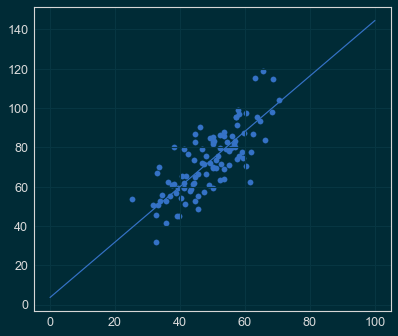

In [6]:
def run() -> None:
    params = [0, 0]
    for i in range(ITERATIONS):
        params = descend(params)
    params = list(map(lambda x: "%.4f"%x, params))
    print(f'y = {params[0]}x + {params[1]} estimates the line of best fit after {ITERATIONS} iterations')
    
    params = list(map(lambda x: float(x), params))
    plt.scatter([x[0] for x in DATA], [y[1] for y in DATA])
    plt.plot([0, 100], [params[1], params[1] + params[0] * 100]) 
    plt.show()
    
if __name__ == '__main__':
    run()

We run the gradient descent algorithm for 1000 iterations, the results are pretty good I guess.